# Data Preparation

## Creating pandas
<blockquote>Pandas has been Imported and numpy for calculations and matplotlib and seaborn has been imported as well for latter. the Data in CSV form has been read into pandas, one column has been replaced for better understanding. info and shape of the data has been retrieved for better understanding. </blockquote>

In [158]:
# Importing Pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing seaborn and matplotlib for latter
import seaborn as sns
import matplotlib.pyplot as plt

# Reading dataset supermarket into pandas
supermarket = pd.read_csv('Desktop/UCD/supermarket.csv')

# Renaming a column 'cogs' to 'cost of goods sold'
supermarket.rename(columns = {'cogs':'Cost_of_goods_sold'},inplace = True)

# Obtaining info and shape of the data 
supermarket.info()
supermarket.shape
supermarket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Invoice_ID     1000 non-null   object
 1   City           1000 non-null   object
 2   Customer_type  1000 non-null   object
 3   Gender         1000 non-null   object
 4   Product_line   1000 non-null   object
 5   Quantity       1000 non-null   int64 
 6   Date           1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Date
0,750-67-8428,Yangon,Member,Female,Health and beauty,7,01/05/2019
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,5,03/08/2019
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,7,03/03/2019
3,123-19-1176,Yangon,Member,Male,Health and beauty,8,1/27/2019
4,373-73-7910,Yangon,Normal,Male,Sports and travel,7,02/08/2019


# Reading another dataset
<blockquote>Another data set of similar form has been read into pandas, renamed the column, info and shape of the data has been retrieved as well. </blockquote>

In [101]:
# Reading another dataset supermarket_payment into pandas
Payment = pd.read_csv('Desktop/UCD/supermarket_payment.csv')

# Renaming coloumn 'cogs' to 'cost of goods sold'
Payment.rename(columns = {'cogs':'Cost_of_goods_sold'},inplace = True)

# Obtaining info for 'payment'
Payment.info()
Payment.shape
Payment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice_ID          1000 non-null   object 
 1   City                1000 non-null   object 
 2   Date                1000 non-null   object 
 3   Payment             1000 non-null   object 
 4   Cost_of_goods_sold  1000 non-null   float64
 5   Profit              1000 non-null   float64
 6   Unit_price          1000 non-null   float64
 7   Total               1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


,Invoice_ID,City,Date,Payment,Cost_of_goods_sold,Profit,Unit_price,Total
0,750-67-8428,Yangon,01/05/2019,Ewallet,522.83,401.28,74.69,548.9715
1,226-31-3081,Naypyitaw,03/08/2019,Cash,76.40,149.80,15.28,80.2200
2,631-41-3108,Yangon,03/03/2019,Credit card,324.31,165.20,46.33,340.5255
3,123-19-1176,Yangon,1/27/2019,Ewallet,465.76,89.60,58.22,489.0480
4,373-73-7910,Yangon,02/08/2019,Ewallet,604.17,918.45,86.31,634.3785


# Merging dataframes
<blockquote> the Dataframes has been merged with left join, the date has been set to index of the data and also sorted in ascending order. duplicates of the data has been dropped. Now the data is ready for analysis. </blockquote>

In [102]:
# Merging two datasets 'supermarket' and 'Payment' using  left join
Supermarket = pd.merge(supermarket, Payment, how="left", on=["Invoice_ID", "Date","City"])

# Changing the dtype of 'Date'
Supermarket['Date'] = pd.to_datetime(Supermarket['Date'])

# Setting 'Date' as index and sorting the index in ascending order
Supermarket = Supermarket.set_index('Date')
Supermarket = Supermarket.sort_index(ascending=True)

# Dropping duplicates from the data if any
Supermarket. drop_duplicates()

,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Payment,Cost_of_goods_sold,Profit,Unit_price,Total
Date,,,,,,,,,,,
2019-01-01,746-04-1077,Mandalay,Member,Female,Food and beverages,10,Credit card,87.45,139.80,84.63,888.615
2019-01-01,770-42-8960,Mandalay,Normal,Male,Food and beverages,8,Cash,382.56,487.76,21.12,177.408
2019-01-01,271-77-8740,Naypyitaw,Member,Female,Sports and travel,6,Ewallet,175.32,579.15,29.22,184.086
2019-01-01,651-88-7328,Yangon,Normal,Female,Fashion accessories,9,Cash,591.66,563.70,65.74,621.243
2019-01-01,556-97-7101,Naypyitaw,Normal,Female,Electronic accessories,2,Cash,126.44,545.22,63.22,132.762
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,291-55-6563,Yangon,Member,Female,Home and lifestyle,6,Ewallet,206.52,304.08,34.42,216.846
2019-03-30,778-89-7974,Naypyitaw,Normal,Male,Health and beauty,6,Cash,421.26,202.65,70.21,442.323
2019-03-30,676-39-6028,Yangon,Member,Female,Electronic accessories,5,Cash,322.20,359.55,64.44,338.310


# Conditional Statements
<blockquote> Products and their unit price are pulled by using the looping function and displayed each product and their prices.</blockquote>

In [103]:
# Selecting products and its price using looping
for index, row in Supermarket.iterrows():
    print(row["Product_line"], row["Unit_price"])

Food and beverages 84.63
Food and beverages 21.12
Sports and travel 29.22
Fashion accessories 65.74
Electronic accessories 63.22
Electronic accessories 74.71
Home and lifestyle 47.59
Sports and travel 72.61
Electronic accessories 74.22
Sports and travel 36.98
Sports and travel 27.04
Health and beauty 62.87
Sports and travel 31.67
Sports and travel 44.63
Sports and travel 42.47
Food and beverages 41.66
Electronic accessories 22.01
Fashion accessories 99.82
Fashion accessories 40.61
Health and beauty 34.21
Home and lifestyle 67.09
Health and beauty 75.88
Health and beauty 21.12
Home and lifestyle 63.15
Health and beauty 62.0
Sports and travel 93.38
Health and beauty 70.01
Health and beauty 23.03
Electronic accessories 66.65
Electronic accessories 72.17
Fashion accessories 68.71
Home and lifestyle 35.54
Health and beauty 20.97
Sports and travel 46.42
Home and lifestyle 62.65
Fashion accessories 76.06
Home and lifestyle 35.38
Health and beauty 74.69
Fashion accessories 73.96
Fashion access

In [104]:
# Getting the average of Total value and storing the value in 'Avg_Total'
Avg_total = Supermarket['Total'].mean()

# Displaying the 'Avg_total'
display(Avg_total)

# Adding a new column 'Total_caps' to tell Total value is higher than the average which is 'True' else its a 'False'
Supermarket['Total_caps'] = Supermarket['Total'].apply(lambda x: 'True' if x >= 323 else 'False')

# Counting the number of values which are higher than the average and lower 
Supermarket['Total_caps'].value_counts()

322.9667489999999

False    596
True     404
Name: Total_caps, dtype: int64

# Creating a New column
<blockquote> New columns has been created for better understanding of the data. the first column is to calculate the profit percentage of each product sold. and the Second column has been created to calculate Number of times the total value of a product sold exceeds 700 Rupees in a day</blockquote>

In [105]:
# Creating a new coloumn to calculate the profit percentage 
Supermarket['Profit_percentage'] = (Supermarket['Profit'] / 
                  Supermarket['Profit'].sum()) * 100

# Displaying first five rows of the data using .head()
Supermarket.head()

,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Payment,Cost_of_goods_sold,Profit,Unit_price,Total,Total_caps,Profit_percentage
Date,,,,,,,,,,,,,
2019-01-01,746-04-1077,Mandalay,Member,Female,Food and beverages,10,Credit card,87.45,139.80,84.63,888.615,True,0.037395
2019-01-01,770-42-8960,Mandalay,Normal,Male,Food and beverages,8,Cash,382.56,487.76,21.12,177.408,False,0.130469
2019-01-01,271-77-8740,Naypyitaw,Member,Female,Sports and travel,6,Ewallet,175.32,579.15,29.22,184.086,False,0.154915
2019-01-01,651-88-7328,Yangon,Normal,Female,Fashion accessories,9,Cash,591.66,563.70,65.74,621.243,True,0.150782
2019-01-01,556-97-7101,Naypyitaw,Normal,Female,Electronic accessories,2,Cash,126.44,545.22,63.22,132.762,False,0.145839


# Data analysis using Groupby functions and Graphs
<blockquote> Data analysis has been done by using .groupby() functions and graphs has been plotted accordingly using matplotlib and seaborn.</blockquote>

,Profit_percentage
,max
City,
Mandalay,0.294904
Naypyitaw,0.278172
Yangon,0.266106


<Figure size 720x432 with 0 Axes>

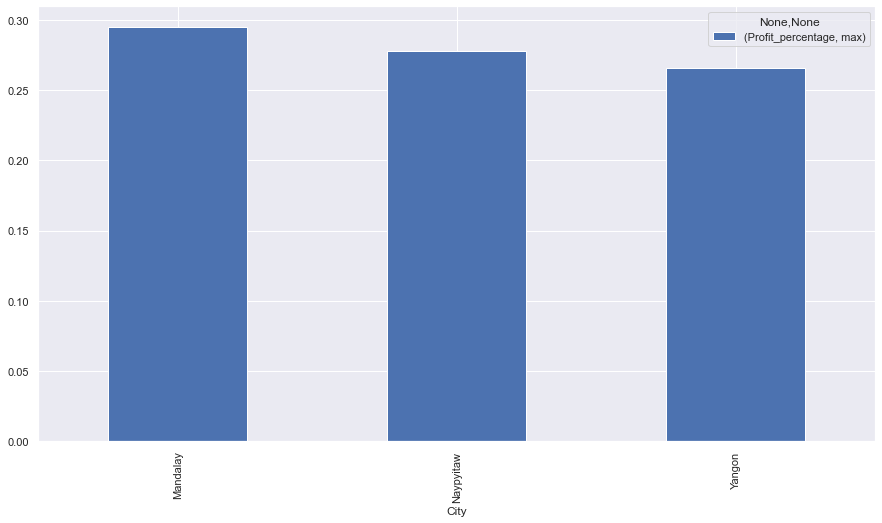

In [155]:
# Obtaining each city and its minimum and maximum Profit percentages using groupby function
City_profit= Supermarket.groupby(['City']).agg({'Profit_percentage':['max']})

# Plotting the data in stacked bar chart using matplotlib
plt.figure(figsize=(10,6))
City_profit.plot.bar()

# Displaying the 'City_profit' data 
display(City_profit)

,Total
,sum
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


<Figure size 720x432 with 0 Axes>

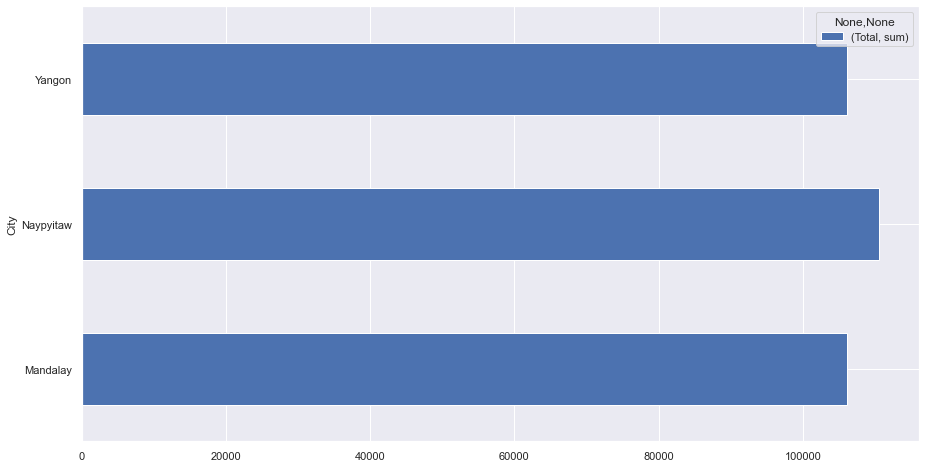

In [156]:
# Getting highest total sales in each city and storing the data in 'Highest_total_sales'
Highest_total_sales= Supermarket.groupby(['City']).agg({'Total':['sum']})

# PLotting the retrieved data in a line plot using matplotlib 
plt.figure(figsize=(10,6))
Highest_total_sales.plot(kind='barh')

# Displaying 'Highest_total_sales'
display(Highest_total_sales)

,Total
Payment,
Cash,326.181890
Credit card,324.009878
Ewallet,318.820600


<Figure size 720x432 with 0 Axes>

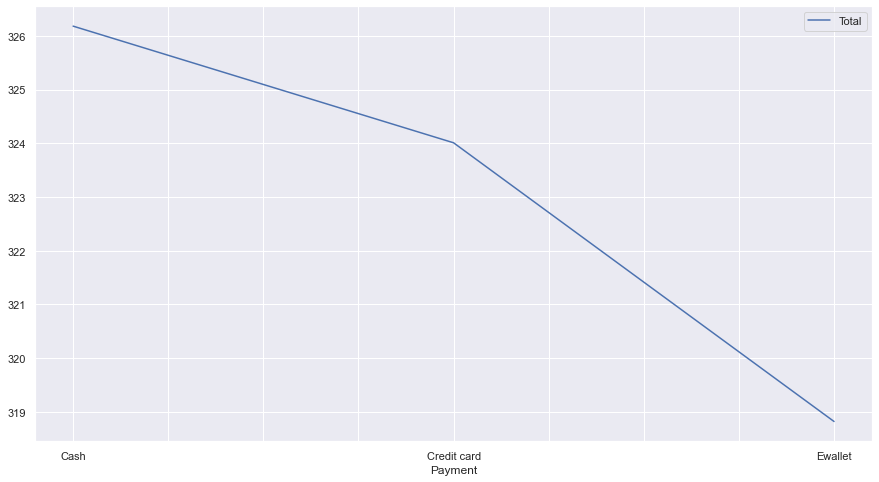

In [157]:
# Obatining Average payment and total value and storing the data in 'Payment_Average' 
Payment_Average= Supermarket.groupby(['Payment']).agg({'Total':'mean'})

# Plotting 'Payment_Average' in a bar graph using matplotlib
plt.figure(figsize=(10,6))
Payment_Average.plot.line()

# Displaying 'Payment_Average'
display(Payment_Average)


,Total
Customer_type,
Member,327.791305
Normal,318.122856


<Figure size 720x432 with 0 Axes>

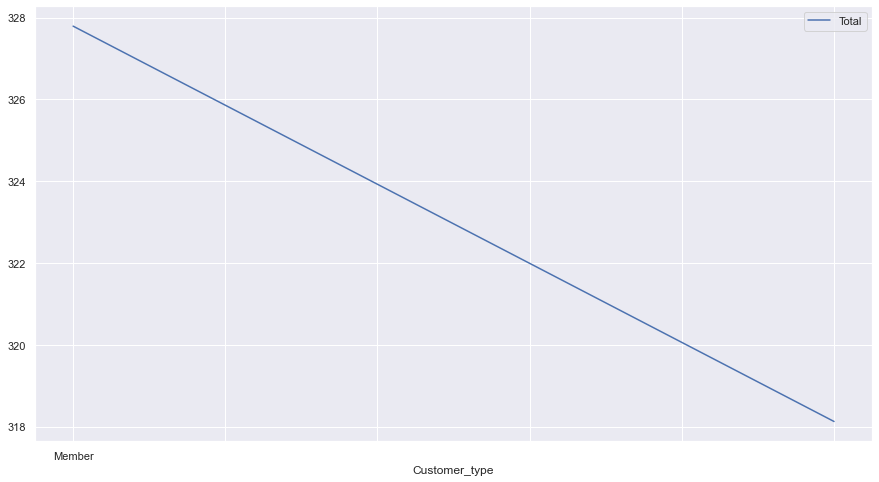

In [152]:
# Getting Customer type and the  Average of Total sales made and storing the data in 'Customer_Avg'
Customer_Avg= Supermarket.groupby(['Customer_type']).agg({'Total':'mean'})

# plotting 'Customer_Avg' in a bar graph 
plt.figure(figsize=(10,6))
Customer_Avg.plot.line()

# displaying 'Customer_Avg' data
display(Customer_Avg)

,Quantity,Cost_of_goods_sold,Profit,Unit_price,Total,Profit_percentage
Product_line,,,,,,
Electronic accessories,971,52156.21,61737.39,9103.77,54337.5315,16.513902
Fashion accessories,902,51883.08,64373.93,10173.35,54305.8950,17.219140
Food and beverages,952,53833.14,64884.95,9745.54,56144.8440,17.355831
Health and beauty,854,47783.82,56877.49,8337.88,49193.7390,15.213945
Home and lifestyle,911,51913.11,60513.81,8850.71,53861.9130,16.186611
Sports and travel,920,54048.78,65463.45,9460.88,55122.8265,17.510571


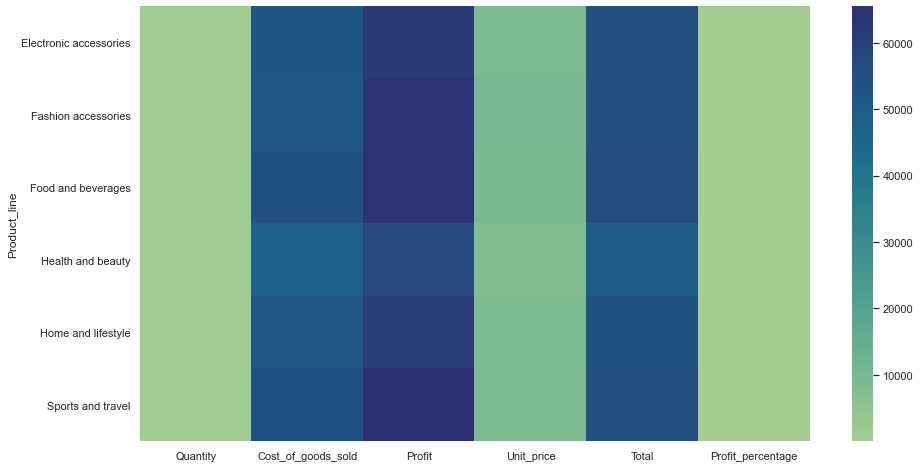

In [111]:
# Obtaining overall product line realtionships by using .sum() and storing the data in 'Product_overall'
Product_overall = Supermarket.groupby(['Product_line']).sum()

# Plotting 'Product_overall' in a heatmap using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Product_overall, cmap="crest")

# Displaying 'Product_overall' table for better understanding
display(Product_overall)

,Cost_of_goods_sold
Product_line,
Electronic accessories,306.801235
Fashion accessories,291.477978
Food and beverages,309.385862
Health and beauty,314.367237
Home and lifestyle,324.456937
Sports and travel,325.595060


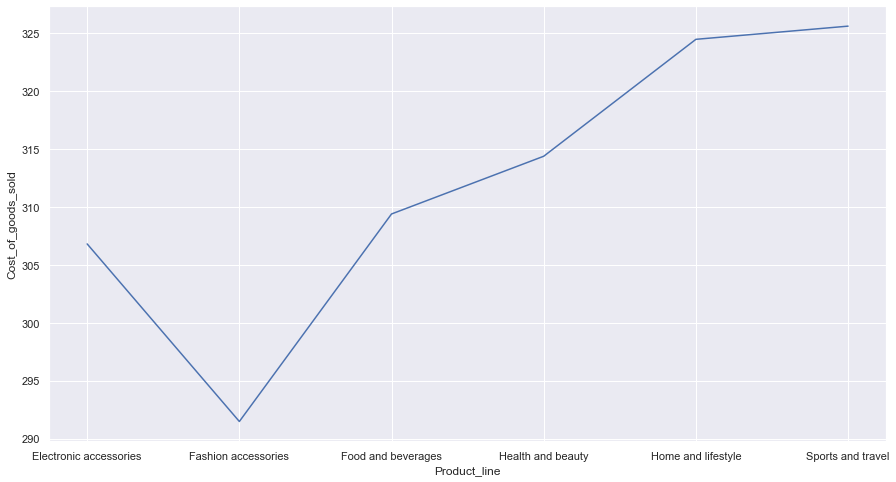

In [112]:
# Getting Average Cost of goods sold in each product line and storing the data in 'Product_cogs'
Product_cogs= Supermarket.groupby(['Product_line']).agg({'Cost_of_goods_sold':'mean'})

# plooting the data in line chart using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=Product_cogs, x="Product_line", y="Cost_of_goods_sold")

# Displaying the 'Product_cogs'
display(Product_cogs)

,Profit_percentage
City,
Mandalay,34.013033
Naypyitaw,32.316354
Yangon,33.670613


<Figure size 720x432 with 0 Axes>

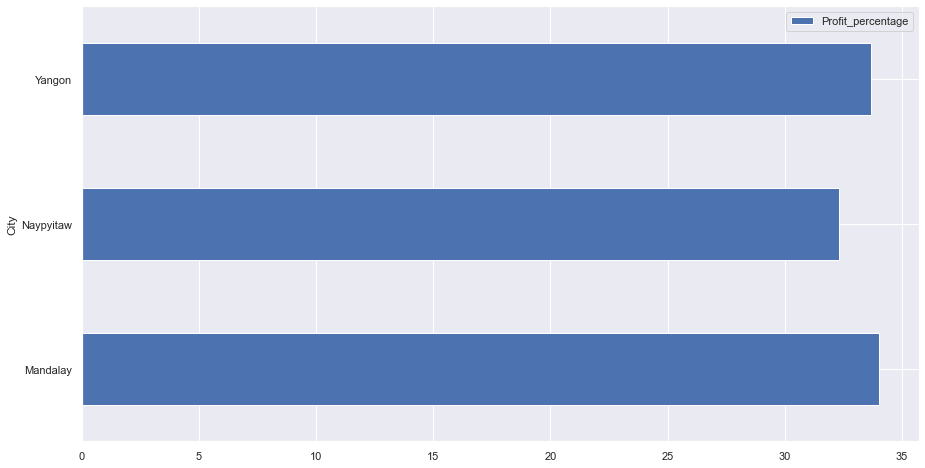

In [134]:
# Obtaining overall cost of goods sold in each city and storing the data in 'City_cogs'
City_cogs = Supermarket.groupby(['City']).agg({'Profit_percentage':'sum'})

# Plotting the data in a line graph using seaborn
plt.figure(figsize=(10,6))
City_cogs.plot(kind='barh')

# Displaying the 'City_cogs' data
display(City_cogs)

Profit
City      Product_line                      
Mandalay  Electronic accessories  386.596727
          Fashion accessories     332.533387
          Food and beverages      379.894600
          Health and beauty       378.514151
          Home and lifestyle      417.282000
          Sports and travel       409.001613
Naypyitaw Electronic accessories  352.292545
          Fashion accessories     409.754308
          Food and beverages      343.992273
          Health and beauty       370.852500
          Home and lifestyle      344.811333
          Sports and travel       384.457111
Yangon    Electronic accessories  351.641333
          Fashion accessories     335.741765
          Food and beverages      399.771207
          Health and beauty       373.019362
          Home and lifestyle      371.280000
          Sports and travel       386.521695

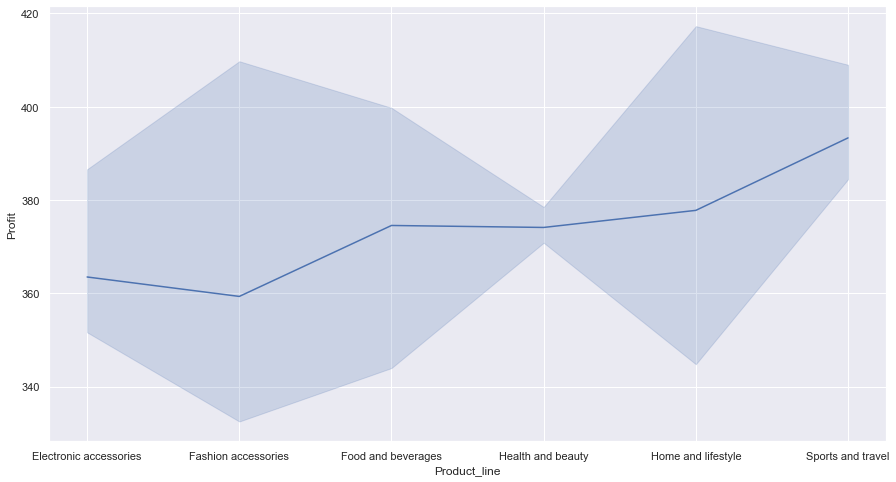

In [114]:
# Obtaing the Overall Profit for each Product sold using .sum() and storing the data in 'Prod_profit'
Prod_profit = Supermarket.groupby(['City','Product_line']).agg({'Profit':'mean'})

# Plotting 'Prod_profit' on a line chart using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data= Prod_profit, x="Product_line", y="Profit")

# Displaying 'Profit_prod' data
display(Prod_profit)

Total
Product_line           City                 
Electronic accessories Mandalay   310.026245
                       Naypyitaw  344.890445
                       Yangon     305.285225
Fashion accessories    Mandalay   264.730911
                       Naypyitaw  331.693385
                       Yangon     320.245265
Food and beverages     Mandalay   304.297770
                       Naypyitaw  360.103864
                       Yangon     295.915526
Health and beauty      Mandalay   376.993585
                       Naypyitaw  319.525500
                       Yangon     268.037298
Home and lifestyle     Mandalay   350.983290
                       Naypyitaw  308.790067
                       Yangon     344.879931
Sports and travel      Mandalay   322.390306
                       Naypyitaw  350.265067
                       Yangon     328.350839

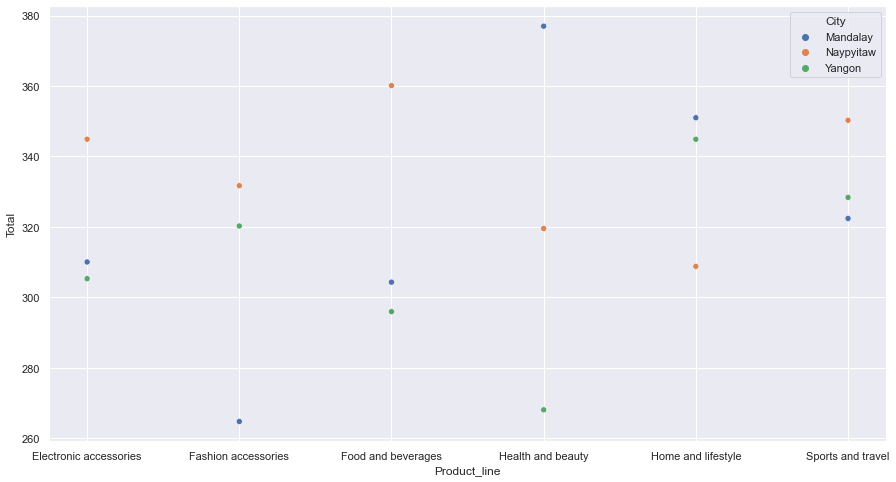

In [115]:
# Obtaining Average total sales of each products sold and each city and storing the data in 'Products_per_city_sold'
Products_per_city_sold = Supermarket.groupby(['Product_line','City']).agg({'Total':'mean'})

# Visualising the data in a scatter plot unsing seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data= Products_per_city_sold, x="Product_line", y="Total", hue="City")

# Displaying 'Products_per_city_sold'
display(Products_per_city_sold)

Profit
Date       City                
2019-01-01 Mandalay    421.5200
           Naypyitaw   459.3475
           Yangon      453.8600
2019-01-02 Mandalay    229.4725
           Naypyitaw   164.6200
...                         ...
2019-03-30 Mandalay    171.1400
           Naypyitaw   149.4675
           Yangon      296.2575
2019-09-18 Mandalay   1102.5000
2019-12-12 Yangon      459.0000

[265 rows x 1 columns]

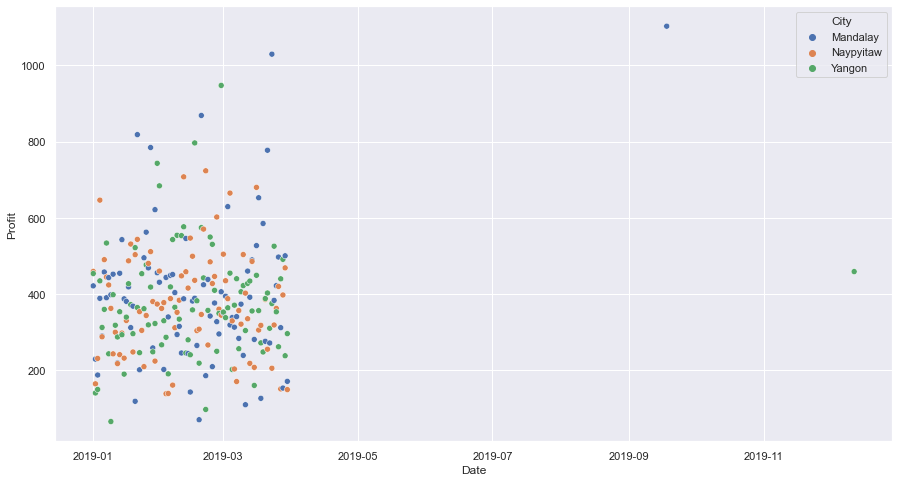

In [127]:
# Getting Average profit per City and storing the data in 'Products_sold'
Products_sold = Supermarket.groupby(['Date','City']).agg({'Profit':'mean'})

# Plotting the data in scatter plot using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data= Products_sold, x="Date", y="Profit", hue="City")

# Displaying the 'Products_sold' data
display(Products_sold)

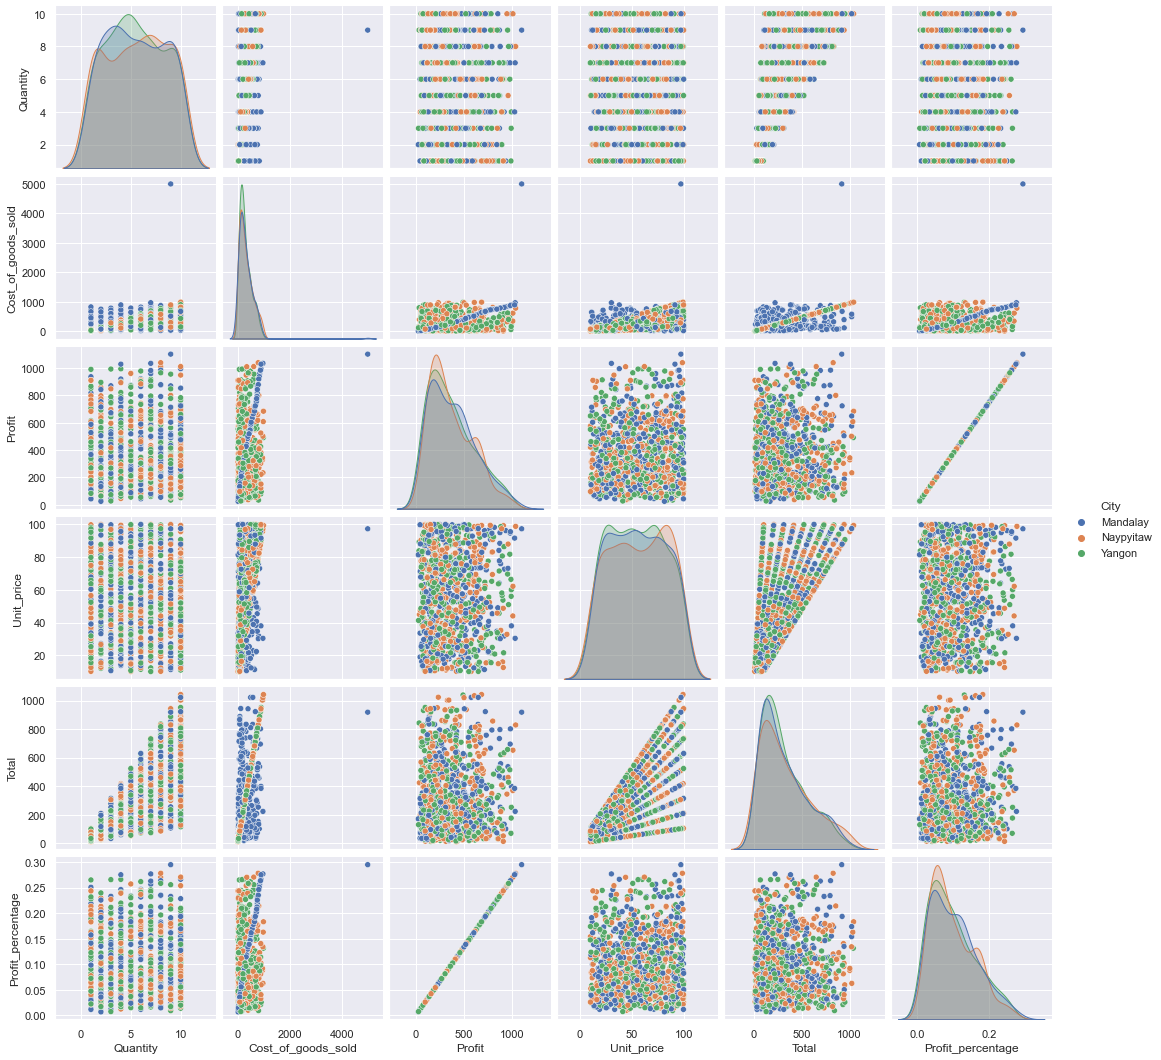

In [117]:
# Obtaining all the relationships posible of 'Supermarket'
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(data =Supermarket , hue='City')